In [3]:
# COSC202 Project Fall 2024
# Group 5:
# - Abd Alrahman Ismaik     (1000#####)
# - Abdulrahman Abdulrahman (1000#####)
# - Abdulaziz Alyazidi      (1000#####)

In [4]:
# 1. Data Exploration
################################################
import pandas as pd
data = pd.read_csv("Datasets\\adult_dataset.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13839 entries, 0 to 13838
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             13838 non-null  float64
 1   workclass       13838 non-null  object 
 2   fnlwgt          13838 non-null  float64
 3   education       13838 non-null  object 
 4   education-num   13838 non-null  float64
 5   marital-status  13838 non-null  object 
 6   occupation      13838 non-null  object 
 7   relationship    13838 non-null  object 
 8   race            13144 non-null  object 
 9   sex             13838 non-null  object 
 10  capital-gain    13838 non-null  float64
 11  capital-loss    13838 non-null  float64
 12  hours-per-week  13838 non-null  float64
 13  native-country  13838 non-null  object 
 14  class           13838 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.6+ MB


In [6]:
import numpy as np
data.replace(' ?', np.nan, inplace=True)

In [7]:
data.isnull().sum()

age                 1
workclass         817
fnlwgt              1
education           1
education-num       1
marital-status      1
occupation        820
relationship        1
race              695
sex                 1
capital-gain        1
capital-loss        1
hours-per-week      1
native-country    227
class               1
dtype: int64

In [8]:
# 1. Data Exploration
################################################
# - Dataset Size: 13,839 rows and 15 columns.
# - Data Types: Includes both numerical and categorical variables.
# - "race", "workclass", "occupation" and "native-country" have notable missing data
# - Other columns have 1 missing entry each.

In [9]:
# Find and delete the row where all columns have NaN values
data = data.dropna(how='all')

# Verify if any rows with all NaN values exist
print("Number of rows with all NaN values:", data.isnull().all(axis=1).sum())

data.isnull().sum()

Number of rows with all NaN values: 0


age                 0
workclass         816
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        819
relationship        0
race              694
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    226
class               0
dtype: int64

In [10]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,13838.000000,1.383800e+04,13838.000000,13838.000000,13838.000000,13838.000000
mean,34.922604,1.897191e+05,10.075083,1062.633184,88.161584,40.456786
std,21.899113,1.061791e+05,2.573751,7474.364070,403.024044,12.457620
min,-88.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,26.000000,1.173100e+05,9.000000,0.000000,0.000000,40.000000
50%,36.000000,1.779070e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


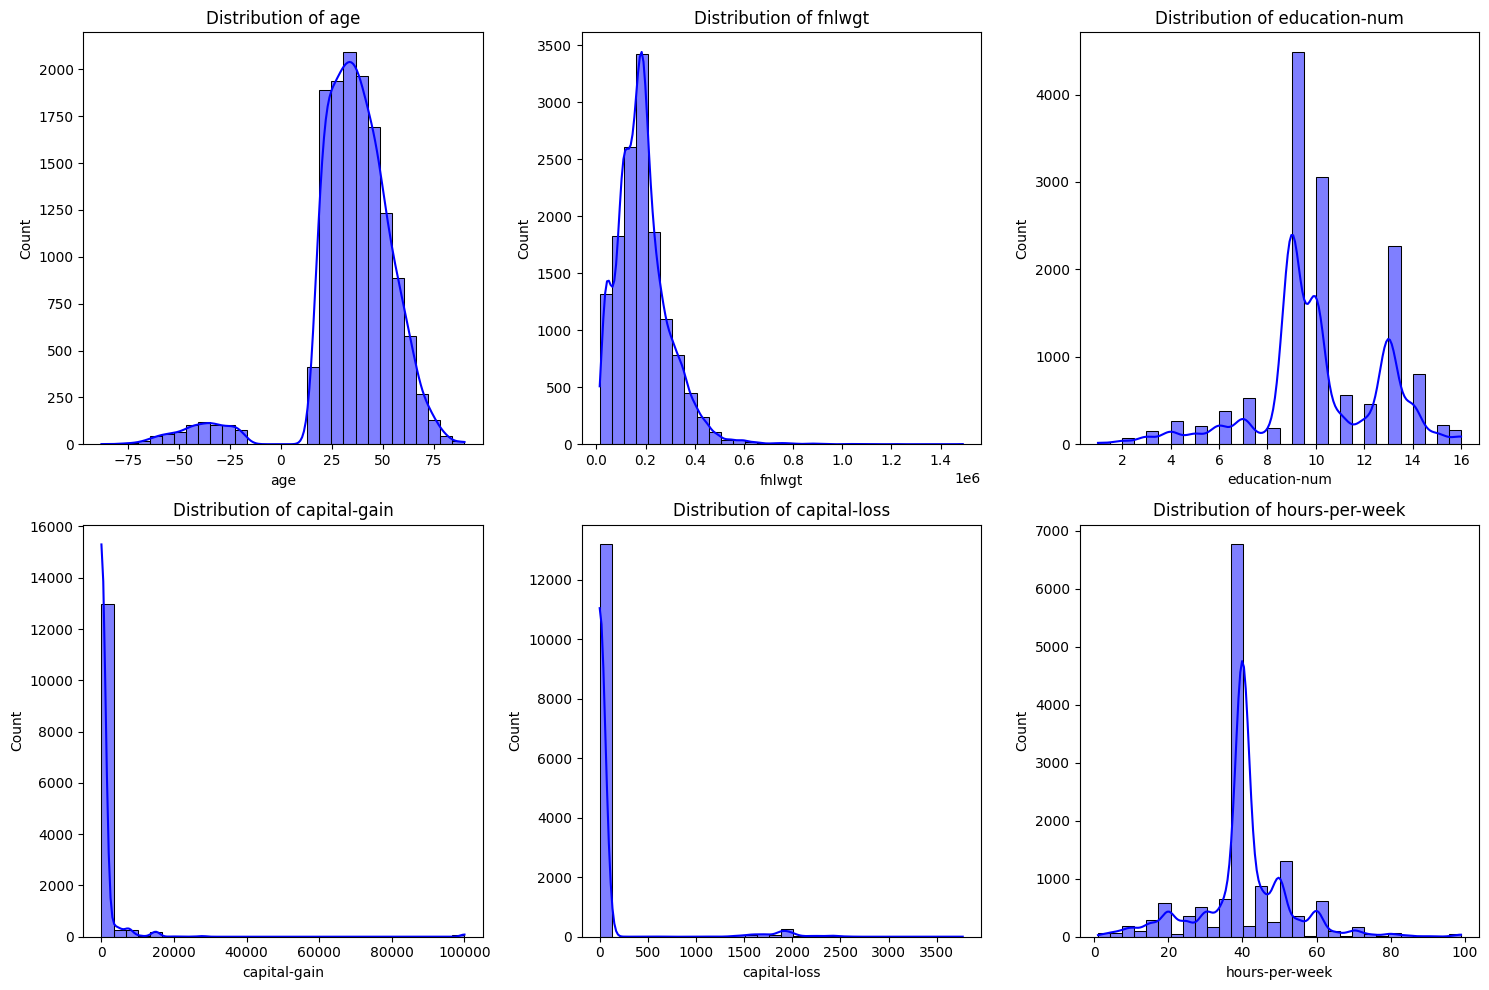

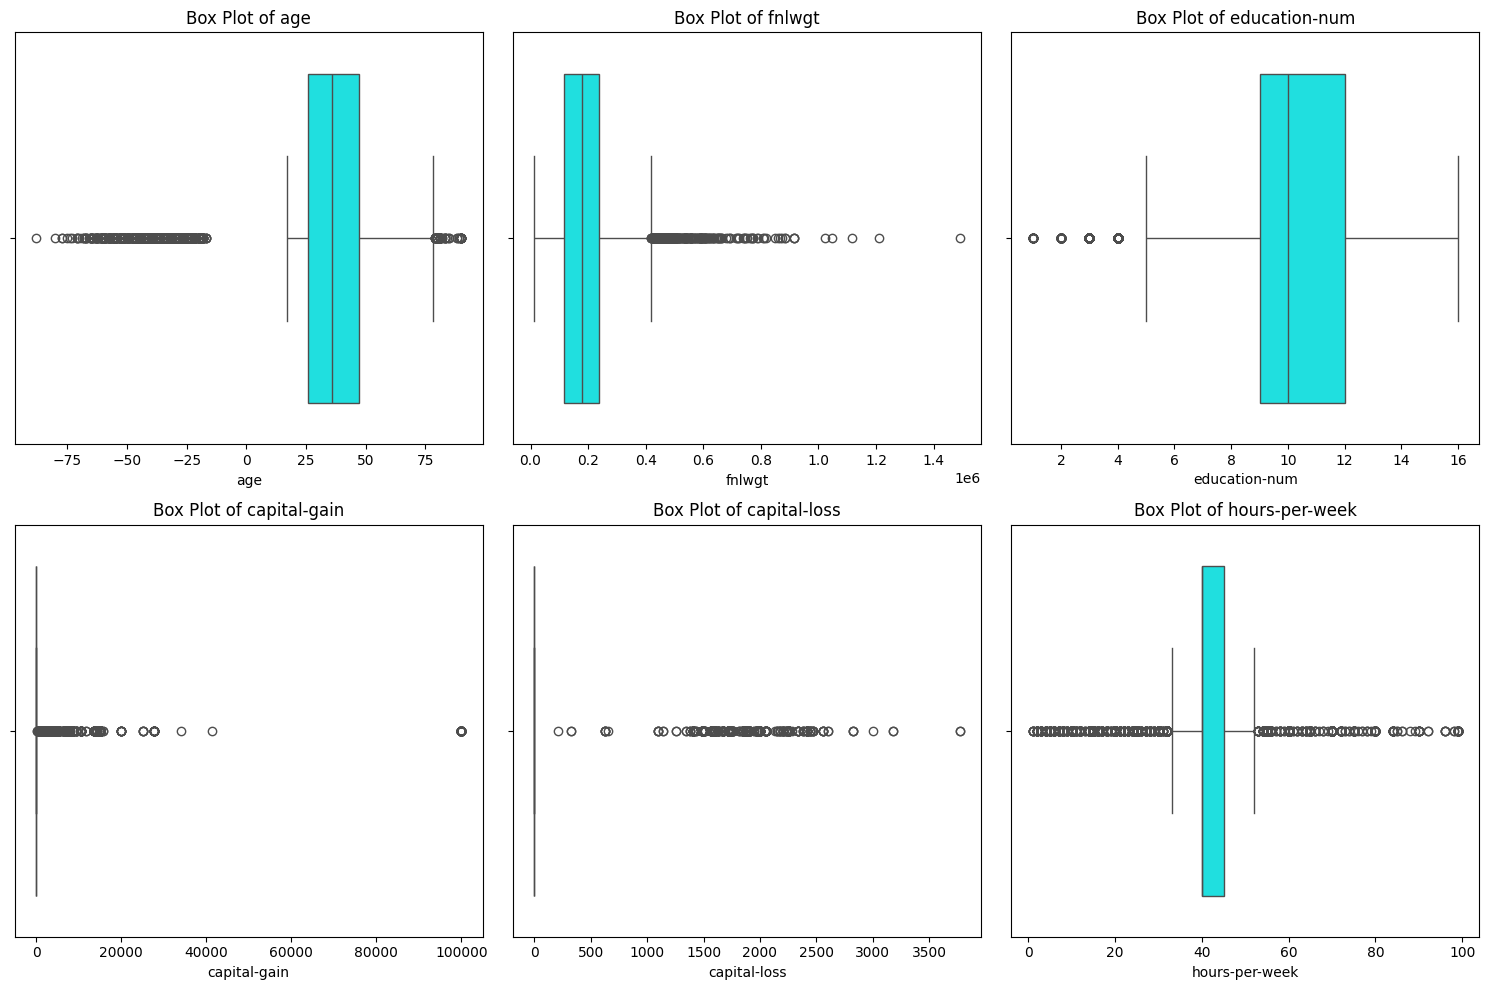

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot numerical feature distributions
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature], color='cyan')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [12]:
# Clear outliers (negative values) in age feature
# capital-gain and capital-loss are highly skewed
# most of the values are 0.0 and a small fraction are non-zero. 
# This skewness can affect the model's performance.

In [13]:
data['capital-gain'] = np.log1p(data['capital-loss'])  # Use log1p to avoid log(0)
data['capital-loss'] = np.log1p(data['capital-loss'])

In [14]:
data["capital-gain"].describe()

count    13838.000000
mean         0.354511
std          1.593800
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.235095
Name: capital-gain, dtype: float64

In [15]:
data["capital-loss"].describe()

count    13838.000000
mean         0.354511
std          1.593800
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.235095
Name: capital-loss, dtype: float64

In [16]:
# Handling age outliers by changing the negative values to positive
data['age'] = data['age'].abs()
data['age'].describe()

count    13838.000000
mean        38.820277
std         13.860907
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

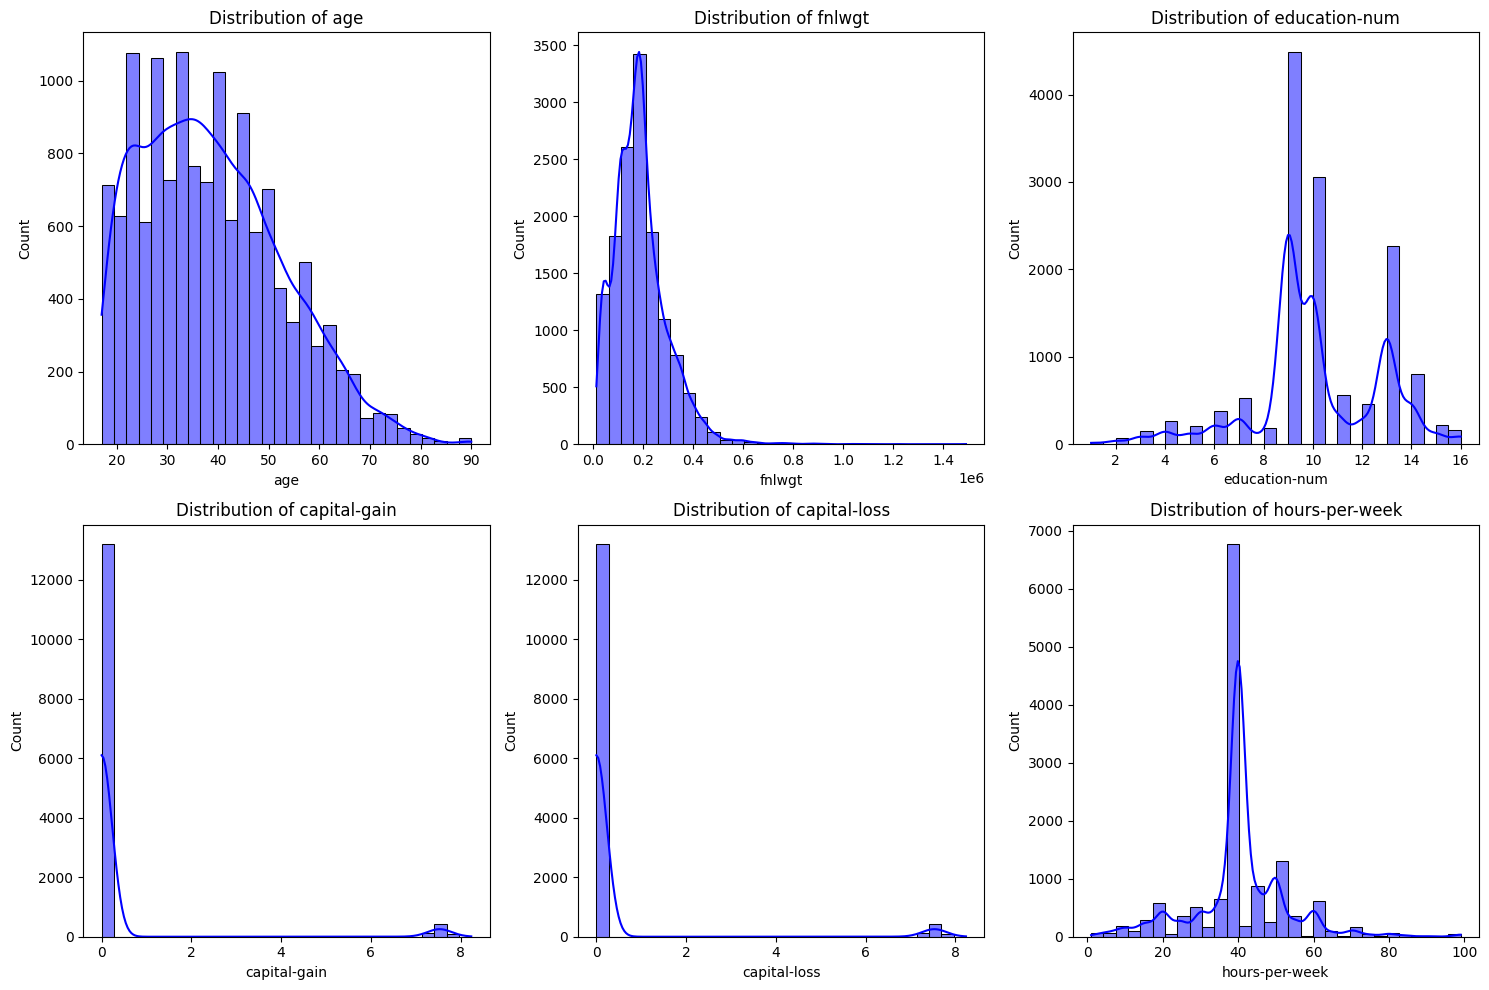

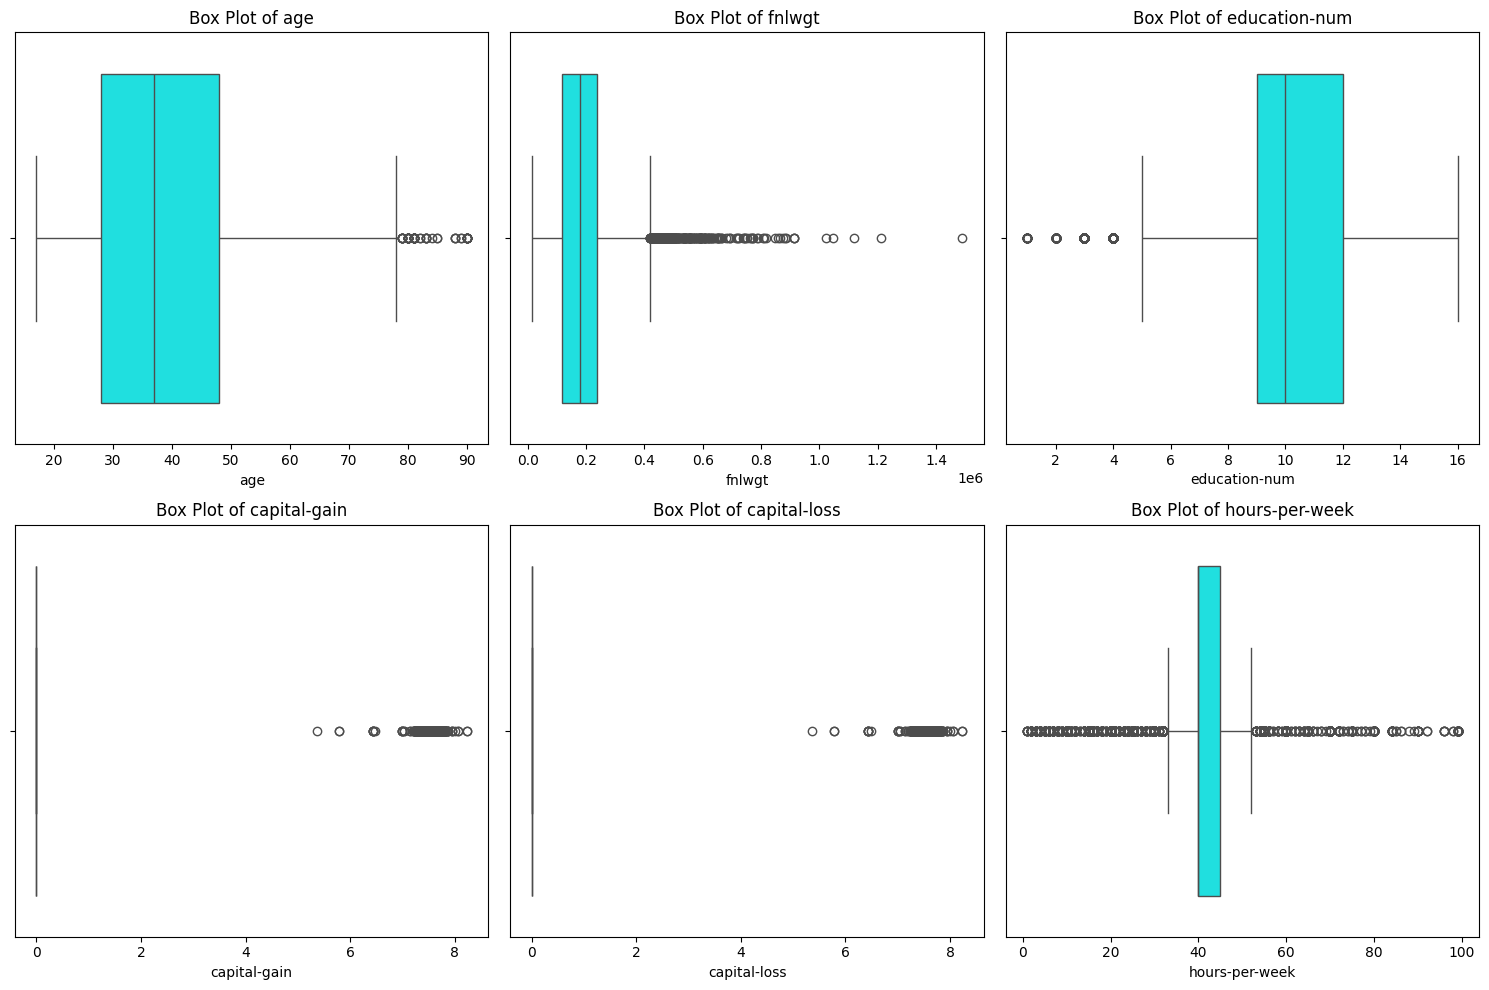

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot numerical feature distributions
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature], color='cyan')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [18]:
# percentage of missing values
data.isnull().sum() / data.shape[0]*100

age               0.000000
workclass         5.896806
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.918485
relationship      0.000000
race              5.015176
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.633184
class             0.000000
dtype: float64

In [19]:
# Percentage of missing values is very small that doesn't exceed 6%
# So we can mask these values or impute them or delete them 
# We will try all and keep the highest accuracy

In [20]:
# Check for duplicates
data.duplicated().sum()

3

In [21]:
data.drop_duplicates(inplace= True)
data.duplicated().sum()

0

In [22]:
print("Number of nan values: ", data['class'].isnull().sum())
data["class"].value_counts()

Number of nan values:  0


class
<=50K.    10554
>50K.      3281
Name: count, dtype: int64

In [23]:
# Will convert label to binary values
binary_mapping = {' <=50K.': 0.0, ' >50K.': 1.0}

# Apply binary encoding
data['class'] = data['class'].map(binary_mapping)

In [24]:
data["class"].value_counts()

class
0.0    10554
1.0     3281
Name: count, dtype: int64

In [25]:
# Will ordinal encode education categorical values
# Define the mapping for ordinal encoding
education_mapping = {
    ' Preschool': 0,
    ' 1st-4th': 1,
    ' 5th-6th': 2,
    ' 7th-8th': 3,
    ' 9th': 4,
    ' 10th': 5,
    ' 11th': 6,
    ' 12th': 7,
    ' HS-grad': 8,
    ' Some-college': 9,
    ' Assoc-voc': 10,
    ' Assoc-acdm': 11,
    ' Bachelors': 12,
    ' Masters': 13,
    ' Prof-school': 14,
    ' Doctorate': 15
}

# Apply the mapping to the 'education' column
data['education'] = data['education'].map(education_mapping)

In [26]:
# Check the correlation of numerical features with the label class
corrData = data.copy().drop(['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis=1)

<Axes: >

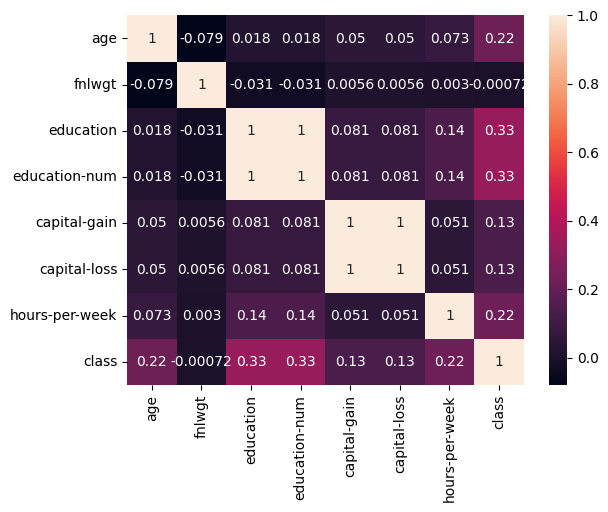

In [27]:
# Make a confusion matrix using seaborn library
import seaborn as sns
sns.heatmap(corrData.corr(), annot=True)

In [28]:
# We can drop fnlwgt as it is very weakly correlated with class
# We can drop education or education num because they are 100% correlated
# Same situation with capital-gain and capital-loss
data = data.drop("fnlwgt", axis=1)
data = data.drop("education-num", axis=1)
data = data.drop("capital-gain", axis=1)

In [29]:
# Will one hot encode marital-status
print("Number of nan values: ", data['marital-status'].isnull().sum())
data['marital-status'].value_counts()

Number of nan values:  0


marital-status
Married-civ-spouse       6303
Never-married            4593
Divorced                 1871
Separated                 445
Widowed                   435
Married-spouse-absent     177
Married-AF-spouse          11
Name: count, dtype: int64

In [30]:
# Will one hot encode occupation
print("Number of nan values: ", data['occupation'].isnull().sum())
data['occupation'].value_counts()

Number of nan values:  819


occupation
Prof-specialty       1736
Craft-repair         1726
Exec-managerial      1725
Sales                1571
Adm-clerical         1562
Other-service        1365
Machine-op-inspct     880
Transport-moving      634
Handlers-cleaners     587
Tech-support          449
Farming-fishing       417
Protective-serv       282
Priv-house-serv        78
Armed-Forces            4
Name: count, dtype: int64

In [31]:
data['occupation'] = data['occupation'].fillna(' Missing')
data['occupation'].value_counts()

occupation
Prof-specialty       1736
Craft-repair         1726
Exec-managerial      1725
Sales                1571
Adm-clerical         1562
Other-service        1365
Machine-op-inspct     880
Missing               819
Transport-moving      634
Handlers-cleaners     587
Tech-support          449
Farming-fishing       417
Protective-serv       282
Priv-house-serv        78
Armed-Forces            4
Name: count, dtype: int64

In [32]:
# Will one hot encode relationship values
print("Number of nan values: ", data['relationship'].isnull().sum())
data['relationship'].value_counts()

Number of nan values:  0


relationship
Husband           5539
Not-in-family     3652
Own-child         2097
Unmarried         1428
Wife               667
Other-relative     452
Name: count, dtype: int64

In [33]:
# Will mask invalid values
print("Number of nan values: ", data['sex'].isnull().sum())
data['sex'].value_counts()

Number of nan values:  0


sex
 Male      8733
 Female    4410
wqeqwrf     355
dasdas      337
Name: count, dtype: int64

In [34]:
# Replace invalid values in 'sex' with ' Male'
data['sex'] = data['sex'].apply(lambda x: x if x in [" Male", " Female"] else " Missing")

# Verify the transformation
print(data['sex'].value_counts())

sex
Male       8733
Female     4410
Missing     692
Name: count, dtype: int64


In [35]:
# Will one hot encode race values and mask the unknown values
print("Number of nan values: ", data['race'].isnull().sum())
data["race"].value_counts()

Number of nan values:  694


race
White                 11236
Black                  1283
Asian-Pac-Islander      391
Amer-Indian-Eskimo      126
Other                   105
Name: count, dtype: int64

In [36]:
# Masking missing values
data["race"] = data['race'].fillna(" Other")
data['race'].value_counts()

race
White                 11236
Black                  1283
Other                   799
Asian-Pac-Islander      391
Amer-Indian-Eskimo      126
Name: count, dtype: int64

In [37]:
# Fill missing values with United States (most frequent)
print("Number of nan values: ", data['native-country'].isnull().sum())
data['native-country'].value_counts()

Number of nan values:  226


native-country
United-States                 12447
Mexico                          269
Philippines                      83
Puerto-Rico                      64
Germany                          56
Canada                           53
India                            46
China                            42
El-Salvador                      41
Cuba                             36
South                            34
England                          31
Haiti                            28
Portugal                         27
Italy                            26
Dominican-Republic               26
Japan                            25
Poland                           22
Columbia                         21
Guatemala                        21
Jamaica                          18
Vietnam                          18
Ecuador                          16
Greece                           16
Iran                             14
Peru                             14
Nicaragua                        13
Ireland      

In [38]:
# Fill missing values with the mode
most_frequent_country = data['native-country'].mode()[0]
data['native-country'] = data['native-country'].fillna(most_frequent_country)

In [39]:
# Will binary encode native-country and mask all other countries than US = 0
data['native-country'] = data['native-country'].apply(lambda x: 1.0 if x == ' United-States' else 0.0)

In [40]:
data["native-country"].value_counts()

native-country
1.0    12673
0.0     1162
Name: count, dtype: int64

In [41]:
# Fill missing values with Private (most frequent)
print("Number of nan values: ", data['workclass'].isnull().sum())
data["workclass"].value_counts()

Number of nan values:  816


workclass
Private             9525
Self-emp-not-inc    1121
Local-gov            883
State-gov            586
Self-emp-inc         489
Federal-gov          407
Without-pay            5
Never-worked           3
Name: count, dtype: int64

In [42]:
# Fill missing values with the mode
data['workclass'] = data['workclass'].fillna(" Private")

# Verify the transformation
print(data['workclass'].value_counts())

workclass
Private             10341
Self-emp-not-inc     1121
Local-gov             883
State-gov             586
Self-emp-inc          489
Federal-gov           407
Without-pay             5
Never-worked            3
Name: count, dtype: int64


In [43]:
# Will impute the one missing numerical value with the median
from sklearn.impute import SimpleImputer

# Select only the numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create an imputer object with the median strategy
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the numerical columns
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

import pickle

# Save the imputer to a file
with open('median_imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)

# Verify the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13835 entries, 0 to 13838
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             13835 non-null  float64
 1   workclass       13835 non-null  object 
 2   education       13835 non-null  float64
 3   marital-status  13835 non-null  object 
 4   occupation      13835 non-null  object 
 5   relationship    13835 non-null  object 
 6   race            13835 non-null  object 
 7   sex             13835 non-null  object 
 8   capital-loss    13835 non-null  float64
 9   hours-per-week  13835 non-null  float64
 10  native-country  13835 non-null  float64
 11  class           13835 non-null  float64
dtypes: float64(6), object(6)
memory usage: 1.4+ MB
None


In [44]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-loss', 'hours-per-week',
       'native-country', 'class'],
      dtype='object')

In [45]:
# One Hot encode the remaining categorical data
data_encoded = pd.get_dummies(
    data, 
    columns=['workclass', 'marital-status', 'occupation',
       'relationship', 'race', 'sex'],
    )

data_encoded = data_encoded.astype(float)
data_encoded.head()

,age,education,capital-loss,hours-per-week,native-country,class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,sex_ Missing
0,40.0,8.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,57.0,4.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,23.0,10.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,26.0,8.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,32.0,9.0,0.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [46]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13835 entries, 0 to 13838
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    13835 non-null  float64
 1   education                              13835 non-null  float64
 2   capital-loss                           13835 non-null  float64
 3   hours-per-week                         13835 non-null  float64
 4   native-country                         13835 non-null  float64
 5   class                                  13835 non-null  float64
 6   workclass_ Federal-gov                 13835 non-null  float64
 7   workclass_ Local-gov                   13835 non-null  float64
 8   workclass_ Never-worked                13835 non-null  float64
 9   workclass_ Private                     13835 non-null  float64
 10  workclass_ Self-emp-inc                13835 non-null  float64
 11  workcla

In [47]:
correlations = data_encoded.corr()  # Compute correlations

# Extract correlations with the label column
label_correlations = correlations['class']  

# Sort correlations in descending order
label_correlations_sorted = label_correlations.sort_values(ascending=False)

# Print the correlations
print(label_correlations_sorted)

class                                    1.000000
marital-status_ Married-civ-spouse       0.449128
relationship_ Husband                    0.407670
education                                0.331507
hours-per-week                           0.224605
age                                      0.223382
occupation_ Prof-specialty               0.202278
occupation_ Exec-managerial              0.198513
sex_ Male                                0.194409
capital-loss                             0.134501
workclass_ Self-emp-inc                  0.130715
relationship_ Wife                       0.119647
race_ White                              0.074118
workclass_ Federal-gov                   0.062835
native-country                           0.039560
workclass_ Local-gov                     0.035869
occupation_ Sales                        0.024871
occupation_ Armed-Forces                 0.020505
workclass_ Self-emp-not-inc              0.019401
workclass_ State-gov                     0.016900


In [48]:
# We can drop classes with very low correlations with label
data_encoded = data_encoded.drop("workclass_ Without-pay", axis=1)
data_encoded = data_encoded.drop("workclass_ Never-worked", axis=1)
data_encoded = data_encoded.drop("sex_ Missing", axis=1)
data_encoded = data_encoded.drop("marital-status_ Married-AF-spouse", axis=1)

In [49]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13835 entries, 0 to 13838
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    13835 non-null  float64
 1   education                              13835 non-null  float64
 2   capital-loss                           13835 non-null  float64
 3   hours-per-week                         13835 non-null  float64
 4   native-country                         13835 non-null  float64
 5   class                                  13835 non-null  float64
 6   workclass_ Federal-gov                 13835 non-null  float64
 7   workclass_ Local-gov                   13835 non-null  float64
 8   workclass_ Private                     13835 non-null  float64
 9   workclass_ Self-emp-inc                13835 non-null  float64
 10  workclass_ Self-emp-not-inc            13835 non-null  float64
 11  workcla

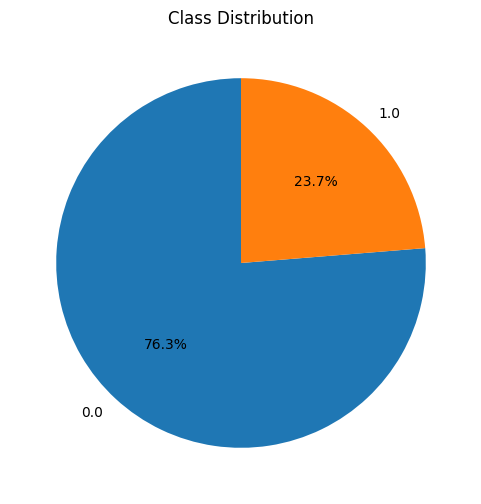

In [50]:
# Imbalance in the label class
data_encoded['class'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title('Class Distribution')
plt.ylabel('')  
plt.show()

In [51]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop("class", axis=1)
y = data_encoded["class"]

# Split the training and test into 80% training and 20% test (validation)
# We assume that the real test data is the one given on demos day
X_train, X_test = train_test_split(X, test_size=0.2, random_state=5, shuffle=True)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=5, shuffle=True)

# Oversampling the Minority Class
# Used SMOTE technique to increase the number of samples in the >50K class.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [52]:
print(f"Training: {len(y_resampled)}, Validation: {len(y_test)}")

Training: 16918, Validation: 2767


In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit to the training data and transform
X_train_processed = scaler.fit_transform(X_resampled)

# Transform the validation and test data
X_test_processed = scaler.transform(X_test)

# Display the standardized training data
X_train_processed

array([[-0.22297326, -1.7909228 ,  3.64935941, ...,  0.44945799,
         1.75075602, -1.55452902],
       [ 2.97871859, -3.34304476, -0.26318227, ..., -2.37841028,
        -0.59307542,  0.67553839],
       [-1.51889615, -0.23880084, -0.26318227, ...,  0.44945799,
        -0.59307542, -1.55452902],
       ...,
       [-0.0641463 , -0.62683133, -0.26318227, ...,  0.44945799,
         1.75075602, -1.55452902],
       [ 1.53033418,  1.34714974, -0.26318227, ...,  0.44945799,
         1.54642009, -1.36011107],
       [ 0.07271727,  0.14922965, -0.26318227, ...,  0.44945799,
        -0.59307542,  0.67553839]])

In [54]:
# Library needed to store this type of file
import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file) # To save the variable into the `scaler.pkl` file.

X_train_processed.shape

(16918, 45)

In [55]:
pd.DataFrame(X_train_processed).head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.222973,-1.790923,3.649359,0.621542,0.292595,5.737157,-0.277985,-1.723901,-0.242772,-0.315168,...,-0.333721,3.604393,-0.270142,-0.085578,-0.17241,-0.284920,-0.24888,0.449458,1.750756,-1.554529
1,2.978719,-3.343045,-0.263182,-2.210402,0.292595,-0.194758,-0.277985,0.637215,-0.242772,-0.315168,...,-0.333721,-0.285214,-0.270142,-0.085578,-0.17241,3.673489,-0.24888,-2.378410,-0.593075,0.675538
2,-1.518896,-0.238801,-0.263182,-0.187585,0.292595,-0.194758,-0.277985,0.637215,-0.242772,-0.315168,...,3.022213,-0.285214,-0.270142,-0.085578,-0.17241,-0.284920,-0.24888,0.449458,-0.593075,-1.554529
3,0.310642,-0.626831,-0.263182,-0.187585,0.292595,-0.194758,-0.277985,0.637215,-0.242772,-0.315168,...,-0.333721,-0.285214,-0.270142,-0.085578,-0.17241,-0.284920,-0.24888,0.449458,1.750756,-1.554529
4,-0.909050,0.537260,-0.263182,0.055153,0.292595,-0.194758,-0.277985,0.637215,-0.242772,-0.315168,...,-0.333721,-0.285214,-0.270142,-0.085578,-0.17241,-0.284920,-0.24888,0.449458,-0.593075,0.675538


In [56]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Display summary of the model
model.summary()

c:\Users\4bais\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,329 (44.25 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Compile with Adam
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [58]:
# Train with `fit`, and display the error graph.
history = model.fit(X_train_processed, y_resampled, epochs=50, validation_data=(X_test_processed, y_test))

Epoch 1/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7511 - loss: 0.4966 - val_accuracy: 0.8030 - val_loss: 0.4004
Epoch 2/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8205 - loss: 0.3952 - val_accuracy: 0.8027 - val_loss: 0.4173
Epoch 3/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8290 - loss: 0.3801 - val_accuracy: 0.7922 - val_loss: 0.4344
Epoch 4/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8342 - loss: 0.3700 - val_accuracy: 0.7940 - val_loss: 0.4298
Epoch 5/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8318 - loss: 0.3636 - val_accuracy: 0.7998 - val_loss: 0.4051
Epoch 6/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8411 - loss: 0.3537 - val_accuracy: 0.7933 - val_loss: 0.4259
Epoch 7/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8417 - loss: 0.3525 - val_accuracy: 0.7922 - val_loss: 0.4257
Epoch 8/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8447 - loss: 0.3471 - val_accuracy: 0.

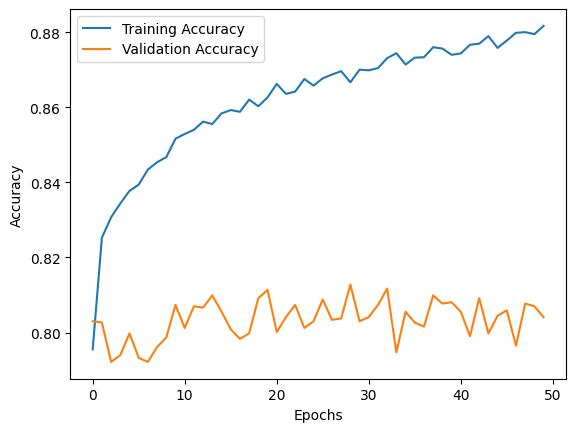

In [59]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
# Define the model
model2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Display summary of the model
model.summary()

c:\Users\4bais\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,989 (132.77 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,660 (88.52 KB)

In [61]:
# Compile with Adam
model2.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
# Train with `fit`, and display the error graph.
history2 = model2.fit(X_train_processed, y_resampled, epochs=50, validation_data=(X_test_processed, y_test))

Epoch 1/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9232 - loss: 0.1703 - val_accuracy: 0.8059 - val_loss: 0.6085
Epoch 2/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9247 - loss: 0.1721 - val_accuracy: 0.8146 - val_loss: 0.6010
Epoch 3/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9250 - loss: 0.1685 - val_accuracy: 0.8048 - val_loss: 0.6167
Epoch 4/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9293 - loss: 0.1633 - val_accuracy: 0.8038 - val_loss: 0.6133
Epoch 5/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9253 - loss: 0.1663 - val_accuracy: 0.8103 - val_loss: 0.6038
Epoch 6/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9246 - loss: 0.1660 - val_accuracy: 0.8135 - val_loss: 0.6236
Epoch 7/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9310 - loss: 0.1606 - val_accuracy: 0.8030 - val_loss: 0.6413
Epoch 8/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9237 - loss: 0.1708 - val_accuracy: 0.

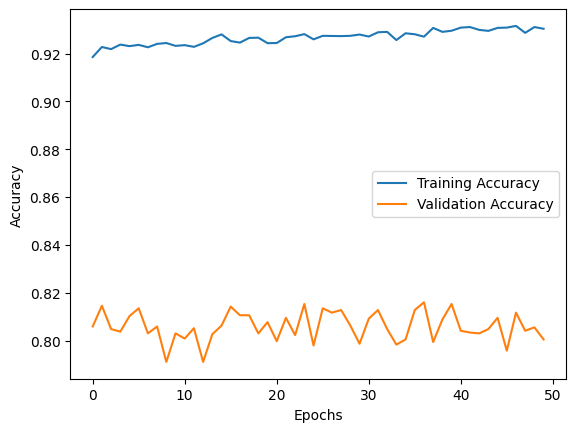

In [65]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model3 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation='relu'), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

# Display summary of the model
model.summary()

c:\Users\4bais\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,989 (132.77 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,660 (88.52 KB)

In [67]:
# Compile with Adam
model3.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
# Train with `fit`, and display the error graph.
history3 = model3.fit(X_train_processed, y_resampled, epochs=50, validation_data=(X_test_processed, y_test))

Epoch 1/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.4256 - val_accuracy: 0.7962 - val_loss: 0.4446
Epoch 2/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8398 - loss: 0.3583 - val_accuracy: 0.8095 - val_loss: 0.3985
Epoch 3/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8503 - loss: 0.3354 - val_accuracy: 0.8135 - val_loss: 0.4030
Epoch 4/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8615 - loss: 0.3112 - val_accuracy: 0.7994 - val_loss: 0.4386
Epoch 5/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8723 - loss: 0.2934 - val_accuracy: 0.8121 - val_loss: 0.4154
Epoch 6/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8721 - loss: 0.2835 - val_accuracy: 0.7922 - val_loss: 0.4515
Epoch 7/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8752 - loss: 0.2734 - val_accuracy: 0.7962 - val_loss: 0.4536
Epoch 8/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8823 - loss: 0.2588 - val_accuracy: 0.

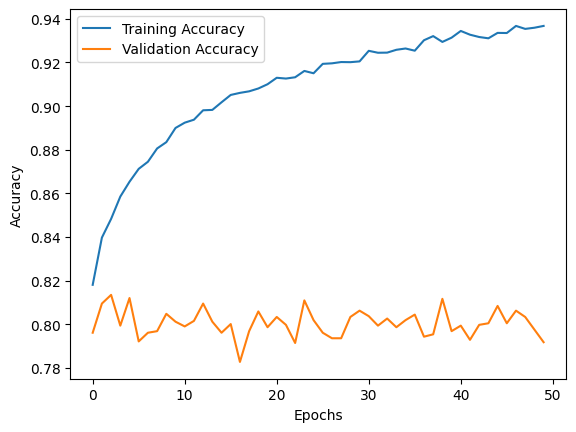

In [69]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
# Define the model
model4 = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'), 
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'), 
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

# Display summary of the model
model.summary()

c:\Users\4bais\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,989 (132.77 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,660 (88.52 KB)

In [71]:
# Compile with Adam
model4.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
# Train with `fit`, and display the error graph.
history4 = model4.fit(X_train_processed, y_resampled, epochs=25, validation_data=(X_test_processed, y_test))

Epoch 1/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.1951 - val_accuracy: 0.8142 - val_loss: 0.5965
Epoch 2/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9120 - loss: 0.1948 - val_accuracy: 0.7987 - val_loss: 0.6014
Epoch 3/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.1909 - val_accuracy: 0.8020 - val_loss: 0.5767
Epoch 4/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9130 - loss: 0.1899 - val_accuracy: 0.8048 - val_loss: 0.5921
Epoch 5/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9106 - loss: 0.1925 - val_accuracy: 0.7965 - val_loss: 0.6687
Epoch 6/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9125 - loss: 0.1836 - val_accuracy: 0.8063 - val_loss: 0.6443
Epoch 7/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9146 - loss: 0.1878 - val_accuracy: 0.8020 - val_loss: 0.5922
Epoch 8/25
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9148 - loss: 0.1845 - val_accuracy: 0.

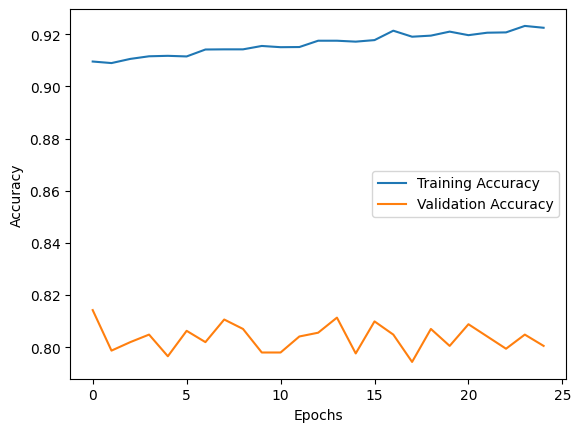

In [74]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
# Define the model
model5 = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.Dense(256, activation='relu'), 
    layers.Dense(256, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

# Display summary of the model
model.summary()

c:\Users\4bais\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,989 (132.77 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,660 (88.52 KB)

In [76]:
# Compile with Adam
model5.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
# Train with `fit`, and display the error graph.
history5 = model5.fit(X_train_processed, y_resampled, epochs=20, validation_data=(X_test_processed, y_test))

Epoch 1/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7939 - loss: 0.4221 - val_accuracy: 0.8070 - val_loss: 0.4139
Epoch 2/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8370 - loss: 0.3598 - val_accuracy: 0.8081 - val_loss: 0.4167
Epoch 3/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8484 - loss: 0.3386 - val_accuracy: 0.7821 - val_loss: 0.5000
Epoch 4/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.3144 - val_accuracy: 0.7962 - val_loss: 0.4111
Epoch 5/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.2966 - val_accuracy: 0.8103 - val_loss: 0.4544
Epoch 6/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8715 - loss: 0.2858 - val_accuracy: 0.8121 - val_loss: 0.4028
Epoch 7/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.2630 - val_accuracy: 0.8171 - val_loss: 0.4265
Epoch 8/20
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8825 - loss: 0.2595 - val_accuracy: 0.

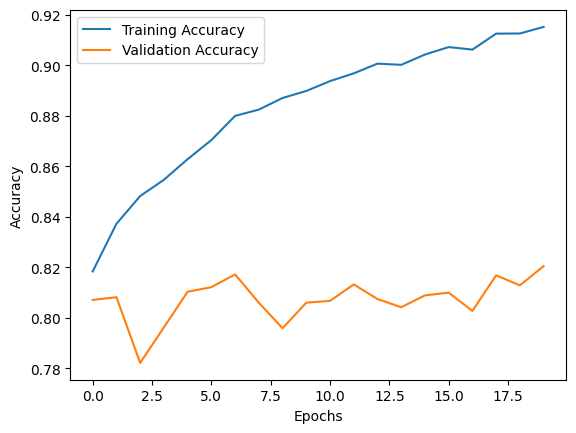

In [78]:
# Plot training history
plt.plot(history5.history['accuracy'], label='Training Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
# save best performance model
model5.save('trained_model.keras')

In [80]:
# Define the model
model6 = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)),
    layers.Dense(256, activation='relu'), 
    layers.Dense(256, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

# Display summary of the model
model.summary()

c:\Users\4bais\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,989 (132.77 KB)

 Trainable params: 11,329 (44.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,660 (88.52 KB)

In [81]:
# Compile with Adam
model6.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
# Train with `fit`, and display the error graph.
history6 = model6.fit(X_train_processed, y_resampled, epochs=50, validation_data=(X_test_processed, y_test))

Epoch 1/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8077 - loss: 0.4229 - val_accuracy: 0.8052 - val_loss: 0.4059
Epoch 2/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8417 - loss: 0.3527 - val_accuracy: 0.8193 - val_loss: 0.3806
Epoch 3/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.3378 - val_accuracy: 0.8121 - val_loss: 0.4114
Epoch 4/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.3214 - val_accuracy: 0.8085 - val_loss: 0.3894
Epoch 5/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.2908 - val_accuracy: 0.7980 - val_loss: 0.4297
Epoch 6/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8751 - loss: 0.2812 - val_accuracy: 0.8110 - val_loss: 0.4529
Epoch 7/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.2701 - val_accuracy: 0.8106 - val_loss: 0.4237
Epoch 8/50
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.2588 - val_accuracy: 0.

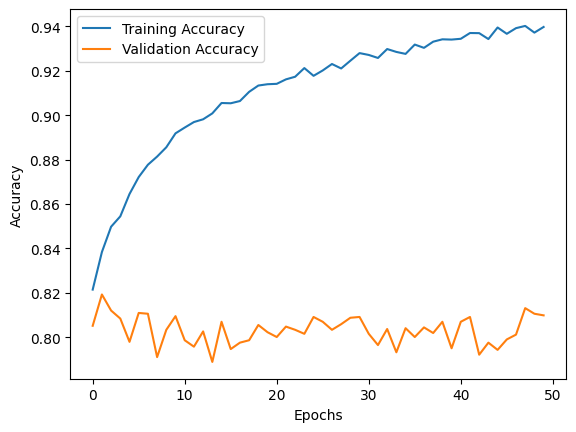

In [83]:
# Plot training history
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()